In [9]:
# All the packages needed for this project

import tkinter as tk 
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from operator import itemgetter
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sklearn.decomposition import PCA

In [29]:
# Read dataset

playerstats = pd.read_csv('Fan_Duel.csv')
# playerstats

In [30]:
# Read dataset

data= pd.read_csv('data.csv')

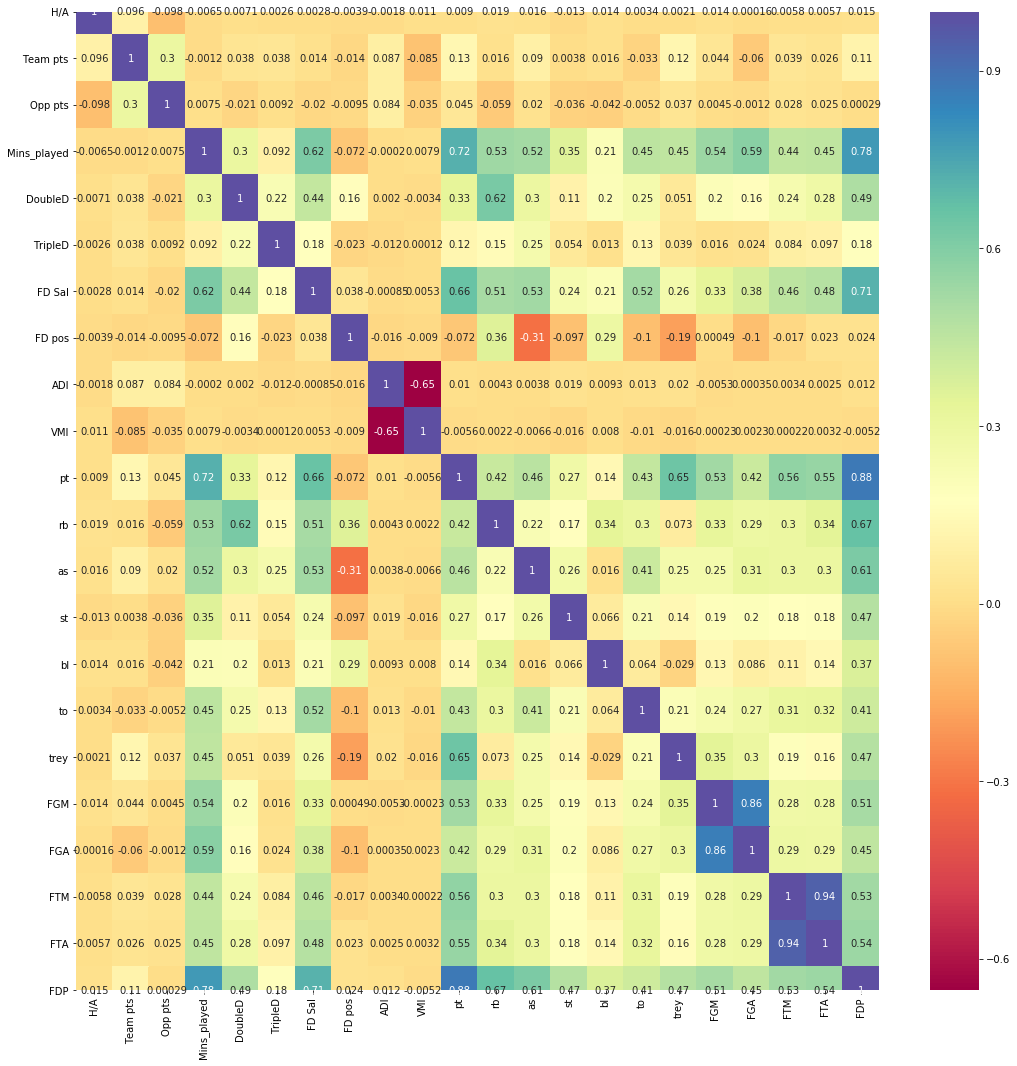

In [6]:
features = ['H/A',
       'Team pts', 'Opp pts','Mins_played',
        'DoubleD', 'TripleD', 'FD Sal', 'FD pos', 'ADI', 'VMI',
       'pt', 'rb', 'as', 'st', 'bl', 'to', 'trey', 'FGM', 'FGA', 'FTM', 'FTA']
# Plot heatmap to see which features have strong corrletation to win shares with others
playerstats = playerstats[features + ["FDP"]]

fig = plt.figure(figsize=(18, 18))

fig.set_facecolor('white')

sns.heatmap(playerstats.corr(), annot=True, cmap="Spectral")

In [31]:
# Assign the data to X and y

X = playerstats[['H/A',
       'Team pts', 'Opp pts','Mins_played',
        'DoubleD', 'TripleD', 'FD Sal', 'FD pos', 'ADI', 'VMI',
       'pt', 'rb', 'as', 'st', 'bl', 'to', 'trey', 'FGM', 'FTM',]]
y = playerstats["FDP"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (15639, 19) (15639, 1)


In [32]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [34]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [35]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# ElasticNet model

from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet(alpha=0.6).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")
print('Model Score: %.2f' % model.score(X_train, y_train))
print('MSE: %.2f' % mean_squared_error(y_test_scaled, predictions))
print('MAE: %.2f' % mean_absolute_error(y_test_scaled, predictions))

MSE: 0.2858280775574361, R2: 0.7218306615713165
Model Score: -0.22
MSE: 0.29
MAE: 0.42


In [37]:
# Make predictions
predictions = model.predict(X_test_scaled)

model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Create a variable for the current season with same selected features used to train the data
current =data[[ 'H/A',
       'Team pts', 'Opp pts', 'Mins_played',
        'DoubleD', 'TripleD', 'FD Sal', 'FD pos', 'ADI', 'VMI',
       'pt', 'rb', 'as', 'st', 'bl', 'to', 'trey', 'FGM', 'FTM',]]

# Predict the win shares of the current dataset
predict=model.predict(current)

In [39]:
# Select the first column of data frame (player names)
player_names = playerstats.iloc[:, 1]


In [40]:
# Get the list of tuples from two lists (predicted FDP and current player names) and merge them by using zip().
combined = []
for i,j  in zip(predict, player_names):
    combined.append({'FDP_pd':i,'Player_name':j})

# Print combined 
combined

[{'FDP_pd': array([1.19215256]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([1.19215256]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([4.45082143]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([1.93794413]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([7.93910344]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([1.33635702e-13]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([0.77502103]), 'Player_name': 'Drew_Eubanks'},
 {'FDP_pd': array([0.26222513]), 'Player_name': 'Kostas_Antetokounmpo'},
 {'FDP_pd': array([0.29145459]), 'Player_name': 'Kostas_Antetokounmpo'},
 {'FDP_pd': array([1.4483671e-13]), 'Player_name': 'Kostas_Antetokounmpo'},
 {'FDP_pd': array([1.149756]), 'Player_name': 'Frank_Mason_III'},
 {'FDP_pd': array([0.91812968]), 'Player_name': 'Frank_Mason_III'},
 {'FDP_pd': array([2.90875538]), 'Player_name': 'Frank_Mason_III'},
 {'FDP_pd': array([1.23628005e-13]), 'Player_name': 'Frank_Mason_III'},
 {'FDP_pd': array([12.87534798]), 'Player_nam

In [41]:
# Create a new dataframe with the predictions
new_df = pd.DataFrame(combined)
new_df

# Convert predicted values to float and round it to 2 integers
new_df['FDP_pd'] = round(new_df['FDP_pd'].astype(float),2)

# Merge the actual FDP from the current dataset to the predicted on the dataframe based on the player
new_df = new_df.merge(playerstats, on = 'Player_name', how = 'inner')

# Create a new column
# Get the difference between the predicted and actual values 
new_df['Difference'] = new_df['FDP_pd'] - new_df['FDP'] 

# Drop the current index of the DataFrame and replace it with an index of increasing integers
new_df.reset_index(drop=True)
new_df

,FDP_pd,Player_name,ID,Date,Team,Opp,H/A,GTime(ET),Team pts,Opp pts,...,as,st,bl,to,trey,FGM,FGA,FTM,FTA,Difference
0,1.19,Drew_Eubanks,5679,20200110,sas,mem,0,20.0,121.0,134.0,...,0,0,0,0,0,0,0,2,2,-0.81
1,1.19,Drew_Eubanks,5679,20200108,sas,bos,0,19.0,129.0,114.0,...,0,0,0,0,0,1,1,0,0,-0.81
2,1.19,Drew_Eubanks,5679,20191228,sas,det,1,20.5,136.0,109.0,...,0,0,0,0,0,3,3,0,0,-8.41
3,1.19,Drew_Eubanks,5679,20191203,sas,hou,1,20.5,135.0,133.0,...,1,0,0,1,0,1,1,0,0,-3.71
4,1.19,Drew_Eubanks,5679,20191201,sas,det,0,17.0,98.0,132.0,...,1,0,1,2,0,4,6,1,1,-19.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614796,9.05,Willie_Cauley-Stein,4817,20191106,gsw,hou,0,19.5,112.0,129.0,...,2,0,0,0,0,1,6,2,2,-2.75
614797,9.05,Willie_Cauley-Stein,4817,20191104,gsw,por,1,22.5,127.0,118.0,...,2,2,0,1,0,4,5,2,2,-12.55
614798,9.05,Willie_Cauley-Stein,4817,20191102,gsw,cha,1,20.5,87.0,93.0,...,2,1,1,0,0,4,7,0,0,-17.55
614799,9.05,Willie_Cauley-Stein,4817,20191101,gsw,sas,1,22.5,110.0,127.0,...,0,1,0,0,0,3,7,0,0,-5.95


In [42]:
bins = [-10, 10, 20, 30, 40, 100]
group_names = ['benchPlayer','belowAvg','average','advanced','top']
new_df['ranking']= pd.cut(new_df['FDP'],bins,labels=group_names)
    

In [43]:
# Keep the first record in the dataset
FDP_predict= new_df.drop_duplicates(['Player_name'], keep = 'first')
FDP_predict

,FDP_pd,Player_name,ID,Date,Team,Opp,H/A,GTime(ET),Team pts,Opp pts,...,st,bl,to,trey,FGM,FGA,FTM,FTA,Difference,ranking
0,1.19,Drew_Eubanks,5679,20200110,sas,mem,0,20.00,121.0,134.0,...,0,0,0,0,0,0,2,2,-0.81,benchPlayer
49,0.26,Kostas_Antetokounmpo,5669,20200110,lal,dal,0,21.75,129.0,114.0,...,0,0,0,0,0,0,0,0,-1.24,benchPlayer
58,1.15,Frank_Mason_III,5153,20191222,mil,ind,1,19.00,117.0,89.0,...,0,0,0,0,0,3,1,2,-2.55,benchPlayer
74,12.88,Louis_Williams,3816,20200201,lac,min,1,15.50,118.0,106.0,...,1,0,2,0,7,19,3,3,-18.92,advanced
2099,12.44,Brandon_Clarke,5837,20200129,mem,nyk,0,19.50,127.0,106.0,...,3,1,2,0,7,10,3,3,-22.06,advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610087,8.88,Omari_Spellman,5755,20200201,gsw,cle,0,20.00,131.0,112.0,...,1,0,2,1,4,8,3,3,-11.62,average
612296,4.25,Tremont_Waters,5849,20200118,bos,pho,1,19.00,119.0,123.0,...,1,0,0,0,1,5,2,2,-10.85,belowAvg
612332,11.39,Sekou_Doumbouya,5866,20200202,det,den,1,12.50,128.0,123.0,...,0,0,2,2,6,12,3,4,-9.61,average
612861,9.67,Josh_Jackson,5130,20200131,mem,nor,0,20.00,111.0,139.0,...,2,0,2,1,6,14,0,1,-14.83,average


In [46]:
FDP_predict.to_csv('fdp.csv',index=False)

In [45]:
FDP_predict.to_csv('fdpTest.csv',index=False)